In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [2]:
x = pd.read_csv('train.csv', encoding='euc-kr')
x

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,count
0,1,0,0,1,9.84,14.395,81,8.831761,2011,1,1,0,16
1,1,0,0,1,9.02,13.635,80,8.527546,2011,1,1,1,40
2,1,0,0,1,9.02,13.635,80,8.456593,2011,1,1,2,32
3,1,0,0,1,9.84,14.395,75,8.614047,2011,1,1,3,13
4,1,0,0,1,9.84,14.395,75,8.437458,2011,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.002700,2012,12,19,19,336
10882,4,0,1,1,14.76,17.425,57,15.001300,2012,12,19,20,241
10883,4,0,1,1,13.94,15.910,61,15.001300,2012,12,19,21,168
10884,4,0,1,1,13.94,17.425,61,6.003200,2012,12,19,22,129


In [3]:
x['season'] = x['season'].astype('category')

In [4]:
x['season']

0        1
1        1
2        1
3        1
4        1
        ..
10881    4
10882    4
10883    4
10884    4
10885    4
Name: season, Length: 10886, dtype: category
Categories (4, int64): [1, 2, 3, 4]

In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  int64   
 2   workingday  10886 non-null  int64   
 3   weather     10886 non-null  int64   
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   year        10886 non-null  int64   
 9   month       10886 non-null  int64   
 10  day         10886 non-null  int64   
 11  hour        10886 non-null  int64   
 12  count       10886 non-null  int64   
dtypes: category(1), float64(3), int64(9)
memory usage: 1.0 MB


In [6]:
season = pd.get_dummies(x['season'], prefix='season')

In [7]:
x['year'].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

In [8]:
year = pd.get_dummies(x['year'], prefix='year')

In [9]:
x = pd.concat([x, season], axis=1)
x = pd.concat([x, year], axis=1)
x = x.drop('season', axis=1)
x = x.drop('year', axis=1)
x = x.drop('atemp', axis=1)
x

,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour,count,season_1,season_2,season_3,season_4,year_2011,year_2012
0,0,0,1,9.84,14.395,81,8.831761,1,1,0,16,1,0,0,0,1,0
1,0,0,1,9.02,13.635,80,8.527546,1,1,1,40,1,0,0,0,1,0
2,0,0,1,9.02,13.635,80,8.456593,1,1,2,32,1,0,0,0,1,0
3,0,0,1,9.84,14.395,75,8.614047,1,1,3,13,1,0,0,0,1,0
4,0,0,1,9.84,14.395,75,8.437458,1,1,4,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,1,15.58,19.695,50,26.002700,12,19,19,336,0,0,0,1,0,1
10882,0,1,1,14.76,17.425,57,15.001300,12,19,20,241,0,0,0,1,0,1
10883,0,1,1,13.94,15.910,61,15.001300,12,19,21,168,0,0,0,1,0,1
10884,0,1,1,13.94,17.425,61,6.003200,12,19,22,129,0,0,0,1,0,1


In [14]:
x['windspeed'] = np.log(x['windspeed'] + 1)
x

,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour,count,season_1,season_2,season_3,season_4,year_2011,year_2012
0,0,0,1,9.84,14.395,81,1.189555,1,1,0,16,1,0,0,0,1,0
1,0,0,1,9.02,13.635,80,1.179943,1,1,1,40,1,0,0,0,1,0
2,0,0,1,9.02,13.635,80,1.177643,1,1,2,32,1,0,0,0,1,0
3,0,0,1,9.84,14.395,75,1.182716,1,1,3,13,1,0,0,0,1,0
4,0,0,1,9.84,14.395,75,1.177019,1,1,4,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,1,15.58,19.695,50,1.457670,12,19,19,336,0,0,0,1,0,1
10882,0,1,1,14.76,17.425,57,1.327783,12,19,20,241,0,0,0,1,0,1
10883,0,1,1,13.94,15.910,61,1.327783,12,19,21,168,0,0,0,1,0,1
10884,0,1,1,13.94,17.425,61,1.080573,12,19,22,129,0,0,0,1,0,1


In [15]:
x.corr()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour,count,season_1,season_2,season_3,season_4,year_2011,year_2012
holiday,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.025570,0.001731,-0.015877,-0.000354,-0.005393,-0.007336,-0.038250,0.022790,0.022751,-0.012021,0.012021
workingday,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.021174,-0.003394,0.009829,0.002780,0.011594,-0.000379,0.014620,-0.007194,-0.007048,0.002482,-0.002482
weather,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,-0.005598,0.012144,-0.007890,-0.022740,-0.128655,0.005414,0.004157,-0.047316,0.037771,0.012548,-0.012548
temp,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,0.029440,0.257589,0.015551,0.145430,0.394454,-0.565655,0.192661,0.635975,-0.266220,-0.061226,0.061226
atemp,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.006098,0.264173,0.011866,0.140343,0.389784,-0.569082,0.204421,0.607090,-0.245690,-0.058540,0.058540
humidity,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.323347,0.204537,-0.011335,-0.278011,-0.317371,-0.166208,-0.031095,0.067308,0.129018,0.078606,-0.078606
windspeed,0.025570,0.021174,-0.005598,0.029440,-0.006098,-0.323347,1.000000,-0.112032,0.021874,0.148752,0.127002,0.080484,0.052054,-0.079463,-0.052604,0.036155,-0.036155
month,0.001731,-0.003394,0.012144,0.257589,0.264173,0.204537,-0.112032,1.000000,0.001974,-0.006818,0.166862,-0.750291,-0.255581,0.248354,0.753087,0.004932,-0.004932
day,-0.015877,0.009829,-0.007890,0.015551,0.011866,-0.011335,0.021874,0.001974,1.000000,0.001132,0.019826,-0.002491,0.001019,0.000941,0.000516,-0.001800,0.001800
hour,-0.000354,0.002780,-0.022740,0.145430,0.140343,-0.278011,0.148752,-0.006818,0.001132,1.000000,0.400601,0.008357,-0.002733,-0.002611,-0.002964,0.004234,-0.004234


In [16]:
X = x.drop('count', axis=1)
Y = x['count']
X

,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour,season_1,season_2,season_3,season_4,year_2011,year_2012
0,0,0,1,9.84,14.395,81,1.189555,1,1,0,1,0,0,0,1,0
1,0,0,1,9.02,13.635,80,1.179943,1,1,1,1,0,0,0,1,0
2,0,0,1,9.02,13.635,80,1.177643,1,1,2,1,0,0,0,1,0
3,0,0,1,9.84,14.395,75,1.182716,1,1,3,1,0,0,0,1,0
4,0,0,1,9.84,14.395,75,1.177019,1,1,4,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,1,15.58,19.695,50,1.457670,12,19,19,0,0,0,1,0,1
10882,0,1,1,14.76,17.425,57,1.327783,12,19,20,0,0,0,1,0,1
10883,0,1,1,13.94,15.910,61,1.327783,12,19,21,0,0,0,1,0,1
10884,0,1,1,13.94,17.425,61,1.080573,12,19,22,0,0,0,1,0,1


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

In [18]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7620, 16), (3266, 16), (7620,), (3266,))

In [76]:
# from sklearn.linear_model import LogisticRegression 
# from sklearn.pipeline import Pipeline 
# from sklearn.model_selection import learning_curve
# from sklearn.preprocessing import StandardScaler

# pipe_lr = Pipeline([('scl',StandardScaler()),('clf',LogisticRegression(penalty='l2',random_state=0))])

# train_sizes, train_scores,test_scores = learning_curve(estimator=pipe_lr, X=x_train, y=y_train, train_sizes=np.linspace(1,0.1,10), cv=10, n_jobs=1)

# train_mean = np.mean(train_scores,axis=1)
# train_std = np.std(train_scores,axis=1)
# test_mean = np.mean(test_scores,axis=1)
# test_std = np.std(test_scores,axis=1)

# plt.plot(train_sizes,train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
# plt.plot(train_sizes,test_mean, color='green',linestyle='--', marker='s', markersize=5, label='validation accuracy')



C:\Users\HYS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as s

KeyboardInterrupt: 

Text(0.5, 0, 'humidity (after transformation)')

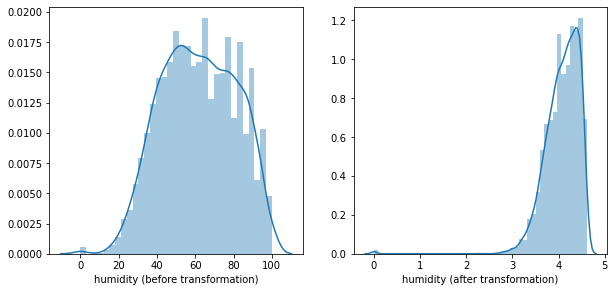

In [19]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.distplot(x_train['humidity'])
plt.xlabel("humidity (before transformation)")
plt.subplot(222)
sns.distplot(np.log(x_train['humidity'] + 1))
plt.xlabel("humidity (after transformation)")

Text(0.5, 0, 'temp')

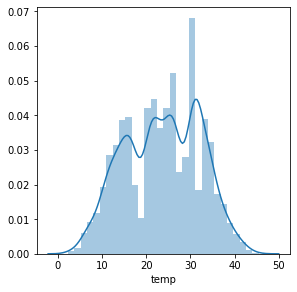

In [20]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.distplot(x_train['atemp'])
plt.xlabel("temp")

Text(0.5, 0, 'temp)')

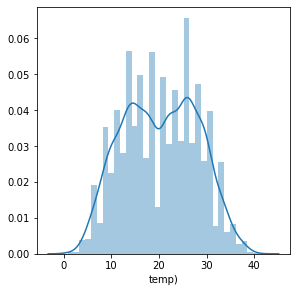

In [21]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.distplot(x_train['temp'])
plt.xlabel("temp)")

In [26]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
import time
#MSE의 변화를 확인하기 위하여 앙상블의 크기 범위에서 랜덤 포레스트 트레이닝
start_time = time.time()
nTreeList = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000]
for iTrees in nTreeList:
    maxFeat = 4 #조정해볼 것
    rf = ensemble.RandomForestRegressor(n_estimators=iTrees,
                                        max_depth=3, max_features=maxFeat,
                                        oob_score=False, random_state=531)
    rf.fit(x_train, y_train)
    #데이터 세트에 대한 MSE 누적
    y_rf = rf.predict(x_test)

    RMSE = mean_squared_error(y_test, y_rf)**0.5
    print('n_estimators : ',iTrees, 'RMSE : ',RMSE)
end_time = time.time()

n_estimators :  50 RMSE :  133.9582949510308
n_estimators :  100 RMSE :  132.75816686237263
n_estimators :  150 RMSE :  132.38742837894242
n_estimators :  200 RMSE :  132.67140447964357
n_estimators :  250 RMSE :  132.5082125738337
n_estimators :  300 RMSE :  132.28519681293625
n_estimators :  350 RMSE :  132.2701444573396
n_estimators :  400 RMSE :  132.32247922208748
n_estimators :  450 RMSE :  132.44938731962552
n_estimators :  500 RMSE :  132.13490408707642
n_estimators :  600 RMSE :  131.9868459663596
n_estimators :  700 RMSE :  132.231522456038
n_estimators :  800 RMSE :  132.23960586701574
n_estimators :  900 RMSE :  132.25536755181432
n_estimators :  1000 RMSE :  132.16974905830654


In [24]:
print('time : ',end_time - start_time)
print('RMSE : ',RMSE)

time :  18.73735523223877
RMSE :  132.16974905830654


In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
%time score = cross_val_score(rf, x_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()

Wall time: 25.5 s


In [29]:
print(score)

1.158350800537146


## xgboost

In [40]:
import xgboost

In [112]:
from sklearn.model_selection import learning_curve
train_sizes = [1, 100, 500, 2000, 5000, 7000,8708]
features = ['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'month', 'day', 'hour', 'season_1', 'season_2', 'season_3', 'season_4', 'year_2011', 'year_2012']
target = 'count'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = xgboost.XGBRegressor(n_estimators=iTrees,
                               learning_rate=0.08,
                               gamma=0,
                               subsample=0.75,
                               colsample_bytree=1,
                               max_depth=7),
            shuffle=True,
            X = x[features],
            y = x[target],
            train_sizes = train_sizes,
            cv = 5,
            scoring = 'neg_mean_squared_error') #평균제곱오차(MSE)의 반대인 음숫값을 계산
                                                #사이킷런의 교차검증은 scoring 매개변수에 (낮을수록 좋은) 비용함수가 아닌
                                                #(클 수록 좋은) 효용 함수를 기대하기 때문


print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[  -409.84530846    -22.74986572 -14370.74729325  -6003.27978624
   -8719.77971627]
 [  -486.65336212   -794.7757706    -549.79978979   -394.0139139
    -554.10255843]
 [  -734.44263774   -767.61959684   -555.86982257   -466.28076831
    -504.09016913]
 [ -1149.66288048  -1018.44831464  -1063.72594283   -787.44617384
    -924.72798922]
 [ -1402.60089606  -1363.23294286  -1288.7600264   -1084.12955566
   -1024.1941151 ]
 [ -1427.19281122  -1417.22098504  -1375.32466974  -1148.25118134
   -1102.70420322]
 [ -1509.15456521  -1429.28019068  -1449.22506451  -1197.39943271
   -1180.85031777]]

 ----------------------------------------------------------------------

Validation scores:

 [[-23653.85021799 -40725.36688472 -99874.81285089 -44399.27965997
  -53356.82071025]
 [-10271.34045552 -10675.64505155 -11313.45119165 -23865.10513536
  -23091.24445805]
 [ -3729.47322684  -3560.21693932  -4771.59409496  -9178.42424854
  -11184.26764085]
 [ -1946.46532551  -2305.44278008  -

In [66]:
# start_time = time.time()
# nTreeList = [0, 1, 5, 10, 15, 20, 30, 35, 40, 45, 50]
# for iTrees in nTreeList:
#     maxFeat = 4 #조정해볼 것
#     xgb = xgboost.XGBRegressor(n_estimators=iTrees,
#                                learning_rate=0.08,
#                                gamma=0,
#                                subsample=0.75,
#                                colsample_bytree=1,
#                                max_depth=7)
#     xgb.fit(x_train, y_train)
#     #데이터 세트에 대한 MSE 누적
#     y_xgb = xgb.predict(x_test)

#     RMSE = mean_squared_error(y_test, y_xgb)**0.5
#     print('n_estimators : ',iTrees, 'RMSE : ',RMSE)

# end_time = time.time()

n_estimators :  0 RMSE :  264.07750009483584
n_estimators :  1 RMSE :  246.40840169550577
n_estimators :  5 RMSE :  186.36653736003313
n_estimators :  10 RMSE :  134.95602539316923
n_estimators :  15 RMSE :  101.48772832852983
n_estimators :  20 RMSE :  80.49740467426909
n_estimators :  30 RMSE :  58.61458892024718
n_estimators :  35 RMSE :  52.01646819533764
n_estimators :  40 RMSE :  48.02506890116608
n_estimators :  45 RMSE :  45.60633300628184
n_estimators :  50 RMSE :  43.80682802964913


In [113]:
from sklearn.model_selection import GridSearchCV
start_time = time.time()
gcv = GridSearchCV(xgb,       # estimator
            param_grid={'n_estimators':[10,20,30,40,50],
                        'learning_rate':[0.08],
                        'gamma':[0],
                        'subsample':[0.75],
                        'colsample_bytree':[1,2,3],
                        'max_depth':[1,2,3,4],
                        } , # 찾고자하는 파라미터. dict형식
            cv=k_fold,
            scoring=rmsle_scorer,  
            n_jobs= 4,     # 병렬 처리갯수? -1은 전부)
            refit=True     # default가 True. 
                           # 좋은 estimator로 수정되어짐.
            )   
gcv
gcv.fit(x_train,y_train)   # train_X, train_Y 
gcv.best_params_           # 좋은 파라미터를 보여줌.
end_time = time.time()
gcv.best_score_

print(gcv.best_params_ )
print(gcv.best_score_)
print('time : ',end_time - start_time)

{'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.08, 'max_depth': 1, 'n_estimators': 30, 'subsample': 0.75}
1.0647943647461704
time :  14.54244327545166


In [114]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1       5905.280394
100      555.869079
500      605.660599
2000     988.802260
5000    1232.583507
7000    1294.138770
8708    1353.181914
dtype: float64

 --------------------

Mean validation scores

 1       52402.026065
100     15843.357258
500      6484.795230
2000     4122.675697
5000     3267.114311
7000     3128.243558
8708     2957.726258
dtype: float64


(0.0, 5000.0)

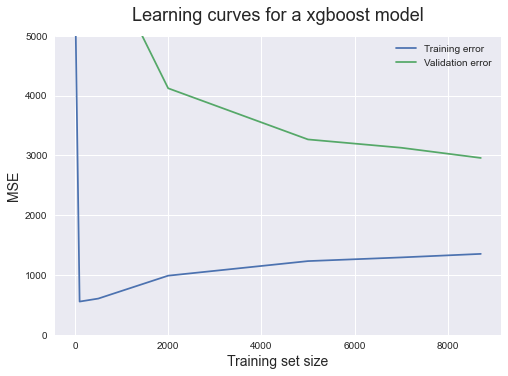

In [118]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a xgboost model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,5000)

## LinearRegression

In [97]:
from sklearn.linear_model import LinearRegression
train_sizes = [1, 100, 500, 2000, 5000, 7000,8708]
features = ['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'month', 'day', 'hour', 'season_1', 'season_2', 'season_3', 'season_4', 'year_2011', 'year_2012']
target = 'count'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(), shuffle=True,
            X = x[features],
            y = x[target],
            train_sizes = train_sizes,
            cv = 5,
            scoring = 'neg_mean_squared_error') #평균제곱오차(MSE)의 반대인 음숫값을 계산
                                                #사이킷런의 교차검증은 scoring 매개변수에 (낮을수록 좋은) 비용함수가 아닌
                                                #(클 수록 좋은) 효용 함수를 기대하기 때문


print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[    -0.             -0.             -0.             -0.
      -0.        ]
 [-14855.66250425 -11331.26378543 -15784.46224898 -10276.35947733
  -10382.44151772]
 [-21279.39140902 -20890.20515402 -22415.29210368 -17969.79981588
  -12898.12534306]
 [-21481.83498646 -22518.30636183 -22696.30187595 -17510.04652598
  -15431.44570777]
 [-20966.60848093 -22659.4478101  -21512.48642142 -17970.10144877
  -16203.35994548]
 [-20810.45498003 -22098.26704306 -21443.7622498  -17695.49793462
  -16327.4441593 ]
 [-21200.69561092 -21653.79758715 -21640.07405905 -17944.45686743
  -16420.23607773]]

 ----------------------------------------------------------------------

Validation scores:

 [[-23181.95867769 -99520.85989894 -40644.5659164  -49571.92237023
  -92304.65502986]
 [-17181.97762074 -13740.89762991 -15913.3532176  -29165.9064072
  -36212.09415708]
 [-16385.99228736 -13561.20013013 -12812.99944769 -28453.77317205
  -35094.17264712]
 [-14721.5495817  -13133.59326631 -12819.082

In [98]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1          -0.000000
100     12526.037907
500     19090.562765
2000    19927.587092
5000    19862.400821
7000    19675.085273
8708    19771.852040
dtype: float64

 --------------------

Mean validation scores

 1       61044.792379
100     22442.845807
500     21261.627537
2000    20530.705863
5000    20435.549215
7000    20468.193328
8708    20508.643227
dtype: float64


(15000.0, 25000.0)

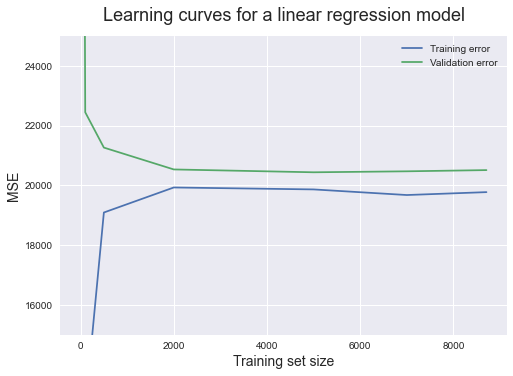

In [101]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(15000,25000)

## lightgbm

In [59]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [126]:
from sklearn.preprocessing import OneHotEncoder
import lightgbm as lgb
params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018}
gbm = lgb.LGBMRegressor(**params)
gbm.fit(x_train, y_train,
        eval_set=[(x_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[1]	valid_0's l1: 141.604	valid_0's l2: 32754
Training until validation scores don't improve for 1000 rounds
[2]	valid_0's l1: 140.403	valid_0's l2: 32198.4
[3]	valid_0's l1: 139.216	valid_0's l2: 31653.3
[4]	valid_0's l1: 138.039	valid_0's l2: 31117.7
[5]	valid_0's l1: 137.4	valid_0's l2: 30865.6
[6]	valid_0's l1: 136.335	valid_0's l2: 30414.4
[7]	valid_0's l1: 135.166	valid_0's l2: 29899.3
[8]	valid_0's l1: 134.137	valid_0's l2: 29466.8
[9]	valid_0's l1: 132.999	valid_0's l2: 28972.7
[10]	valid_0's l1: 131.878	valid_0's l2: 28489.5
[11

LGBMRegressor(bagging_fraction=0.7, bagging_freq=5, boosting='gbdt',
              feature_fraction=0.9, is_training_metric=True, learning_rate=0.01,
              max_depth=16, metric='mse', num_leaves=144,
              objective='regression', seed=2018)

In [132]:
from sklearn.metrics import mean_squared_error, r2_score
predict_train = gbm.predict(x_train)
predict_test = gbm.predict(x_test)
mse = mean_squared_error(y_test, predict_test)
r2 = r2_score(y_test, predict_test)
print('mse : ',mse)
print('r2 : ',r2)

mse :  8403.036580142061
r2 :  0.7478274329910584


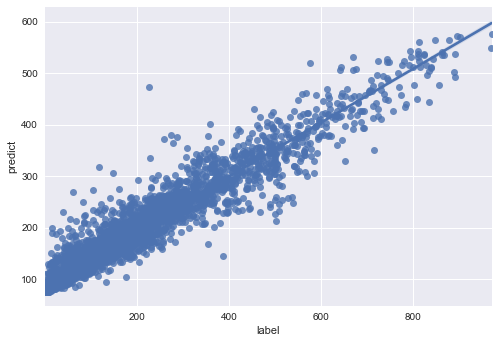

In [134]:
final_result = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)
final_result.columns = ['label','predict']
sns.regplot(x = 'label', y = 'predict', data = final_result)